<a href="https://colab.research.google.com/github/Anshad-Aziz/technical-training/blob/main/Revenu_Growth_Largest_companies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd


In [2]:
data=pd.read_csv('LargestCompaniesInUSAbyReveneue.csv')

In [3]:
data.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,General merchandisers,"572,754",2.4%,"2,300,000","Bentonville, Arkansas"
1,2,Amazon,Retail and Cloud Computing,"469,822",21.7%,"1,608,000","Seattle, Washington"
2,3,Apple,Electronics industry,"365,817",33.2%,"154,000","Cupertino, California"
3,4,CVS Health,Healthcare,"292,111",32.0%,"258,000","Woonsocket, Rhode Island"
4,5,UnitedHealth Group,Healthcare,"287,597",11.8%,"350,000","Minnetonka, Minnesota"


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Rank                    100 non-null    int64 
 1   Name                    100 non-null    object
 2   Industry                100 non-null    object
 3   Revenue (USD millions)  100 non-null    object
 4   Revenue growth          100 non-null    object
 5   Employees               100 non-null    object
 6   Headquarters            100 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.6+ KB


In [5]:
data.describe()

,Rank
count,100.000000
mean,50.500000
std,29.011492
min,1.000000
25%,25.750000
50%,50.500000
75%,75.250000
max,100.000000


In [6]:
data.isnull().sum()

Rank                      0
Name                      0
Industry                  0
Revenue (USD millions)    0
Revenue growth            0
Employees                 0
Headquarters              0
dtype: int64

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.impute import SimpleImputer
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
data.head(2)

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,General merchandisers,"572,754",2.4%,"2,300,000","Bentonville, Arkansas"
1,2,Amazon,Retail and Cloud Computing,"469,822",21.7%,"1,608,000","Seattle, Washington"


In [9]:
data['Revenue (USD millions)']=data['Revenue (USD millions)'].str.replace(',','').astype(float)
data['Employees']=data['Employees'].str.replace(',','').astype(int)


In [10]:
data.head(2)

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,General merchandisers,572754.0,2.4%,2300000,"Bentonville, Arkansas"
1,2,Amazon,Retail and Cloud Computing,469822.0,21.7%,1608000,"Seattle, Washington"


In [11]:
data['Revenue growth']=data['Revenue growth'].str.rstrip('%').astype(float)/100

In [12]:
data.head(2)

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,General merchandisers,572754.0,0.024,2300000,"Bentonville, Arkansas"
1,2,Amazon,Retail and Cloud Computing,469822.0,0.217,1608000,"Seattle, Washington"


In [13]:
X=data[['Rank','Revenue (USD millions)','Employees']]
y=data['Revenue growth']

In [15]:
X

,Rank,Revenue (USD millions),Employees
0,1,572754.0,2300000
1,2,469822.0,1608000
2,3,365817.0,154000
3,4,292111.0,258000
4,5,287597.0,350000
...,...,...,...
95,96,38469.0,103100
96,97,38448.0,9941
97,98,37470.0,37335
98,99,36751.0,7585


In [16]:
y

0     0.024
1     0.217
2     0.332
3     0.320
4     0.118
      ...  
95    0.087
96    0.014
97    0.032
98    0.088
99    0.812
Name: Revenue growth, Length: 100, dtype: float64

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'XGBoost': xgb.XGBRegressor(),
    'LightGBM': lgb.LGBMRegressor(),
    'Gradient Boosting Regressor' : GradientBoostingRegressor(),
    'ADA Boost' : AdaBoostRegressor(),
    'Linear SVR' : LinearSVR(),
}

Results for Linear Regression:
Mean Squared Error: 0.1180352190414132
R-squared Score: 0.019085790722084495


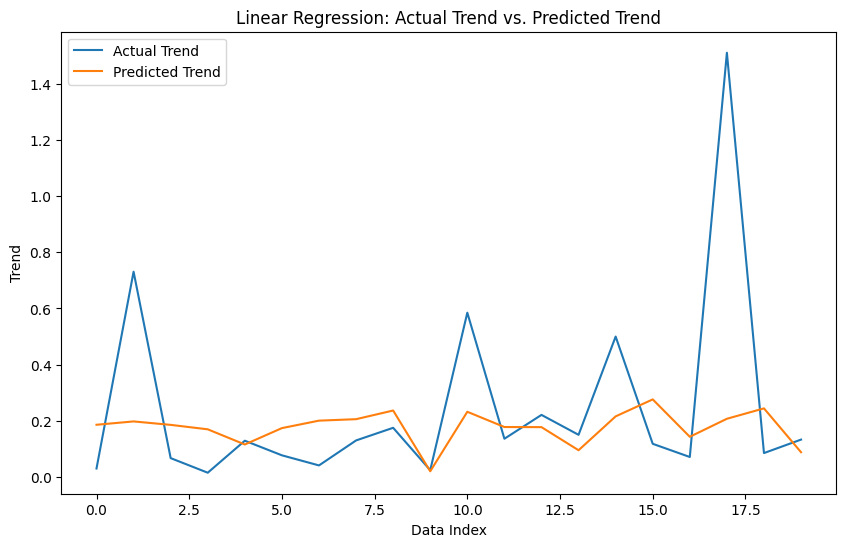


Results for Decision Tree:
Mean Squared Error: 0.1425118
R-squared Score: -0.18432321086069914


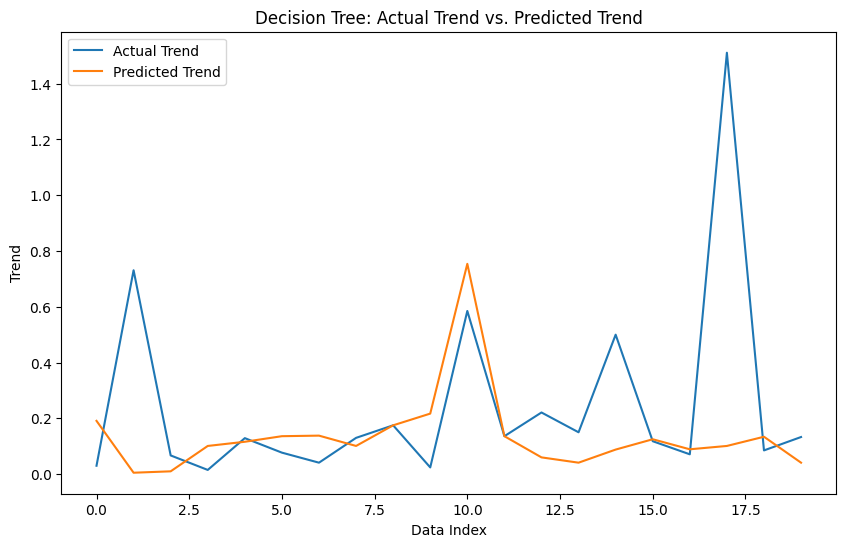


Results for Random Forest:
Mean Squared Error: 0.13507825690500003
R-squared Score: -0.12254785172312777


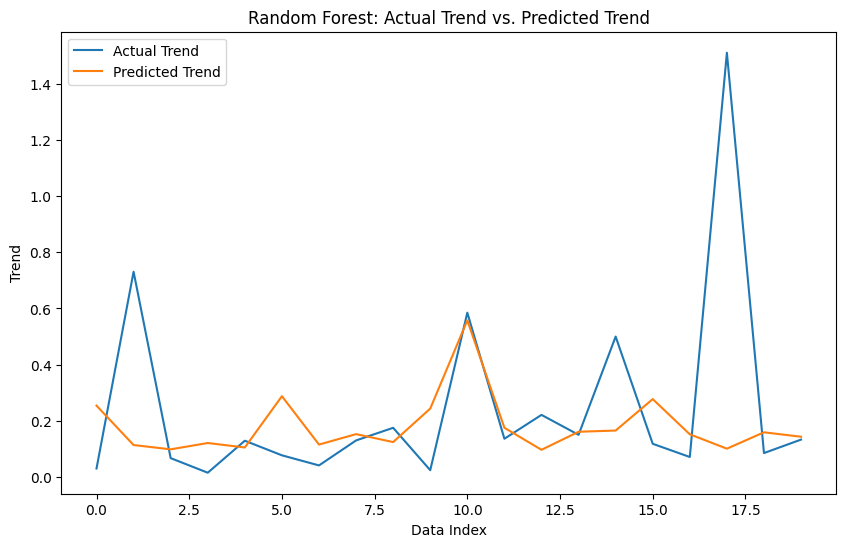


Results for SVR:
Mean Squared Error: 0.13385196719141906
R-squared Score: -0.11235695264646428


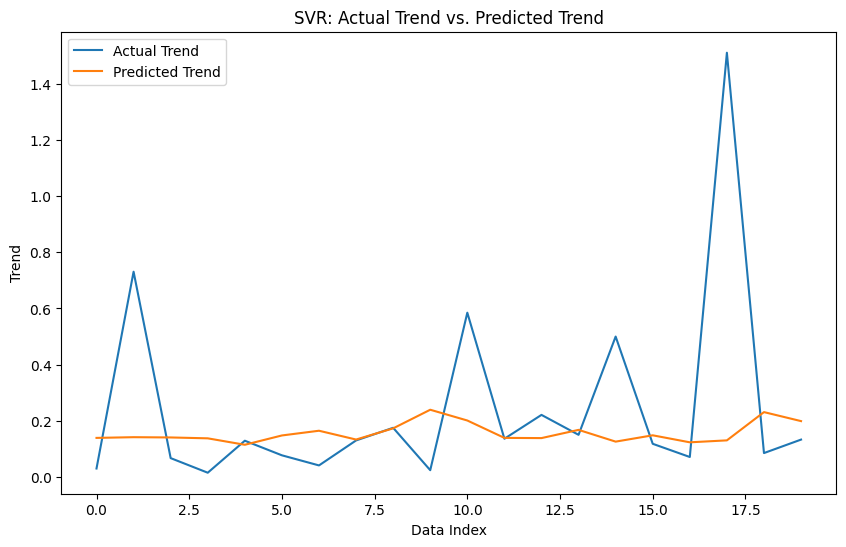


Results for XGBoost:
Mean Squared Error: 0.1316660183304022
R-squared Score: -0.09419094833063402


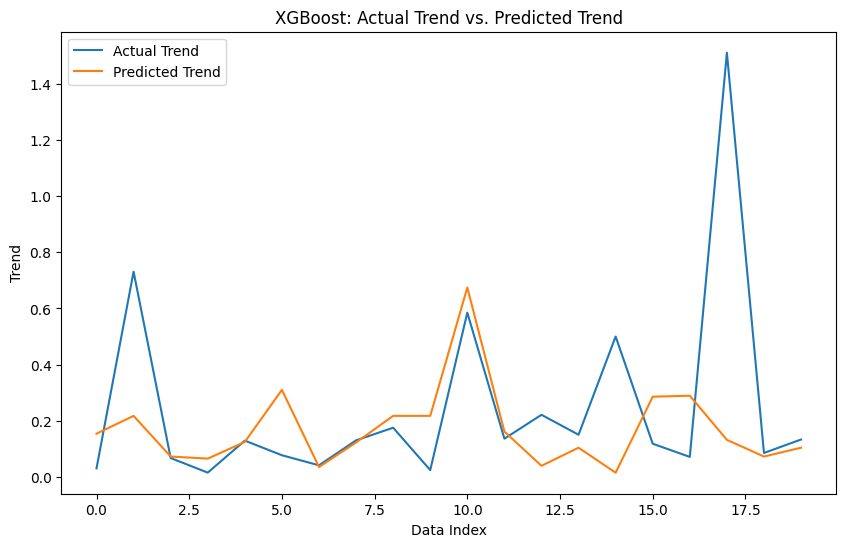


Results for LightGBM:
Mean Squared Error: 0.110556087563178
R-squared Score: 0.08124000536783904


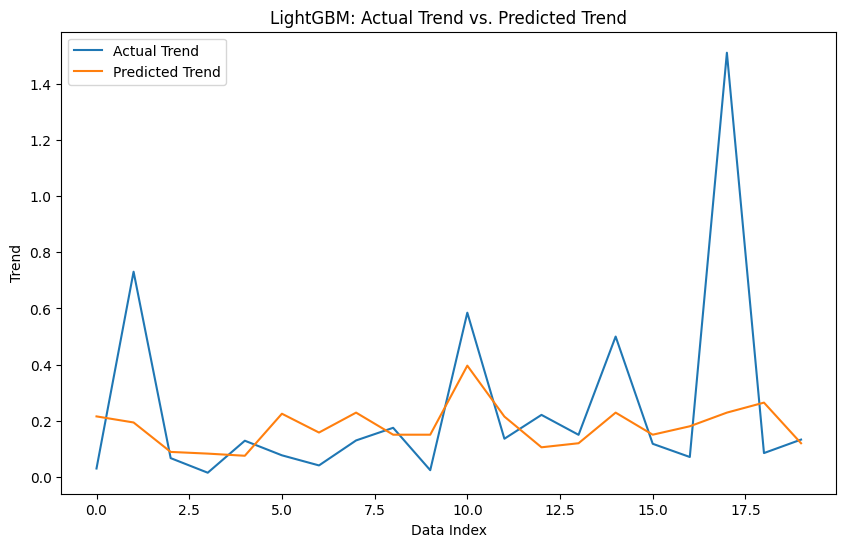


Results for Gradient Boosting Regressor:
Mean Squared Error: 0.13250753551010913
R-squared Score: -0.10118425224136218


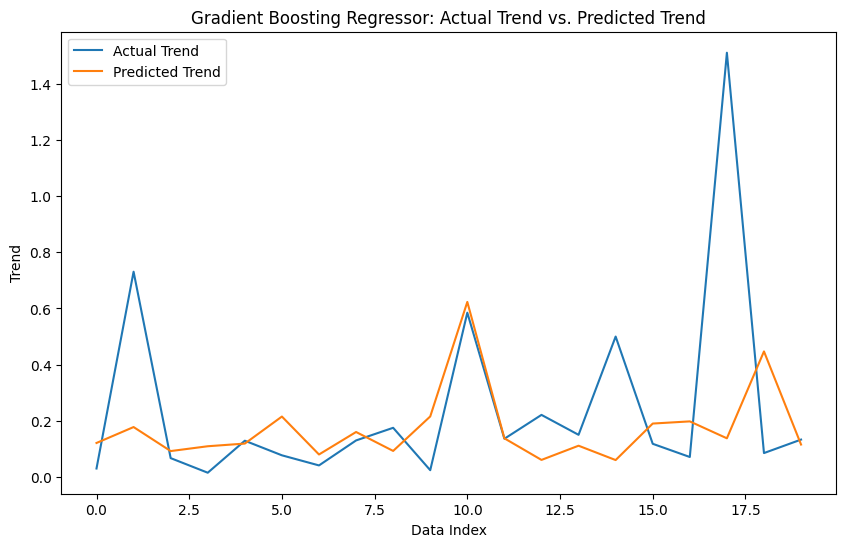


Results for ADA Boost:
Mean Squared Error: 0.11763354844219558
R-squared Score: 0.02242381475780475


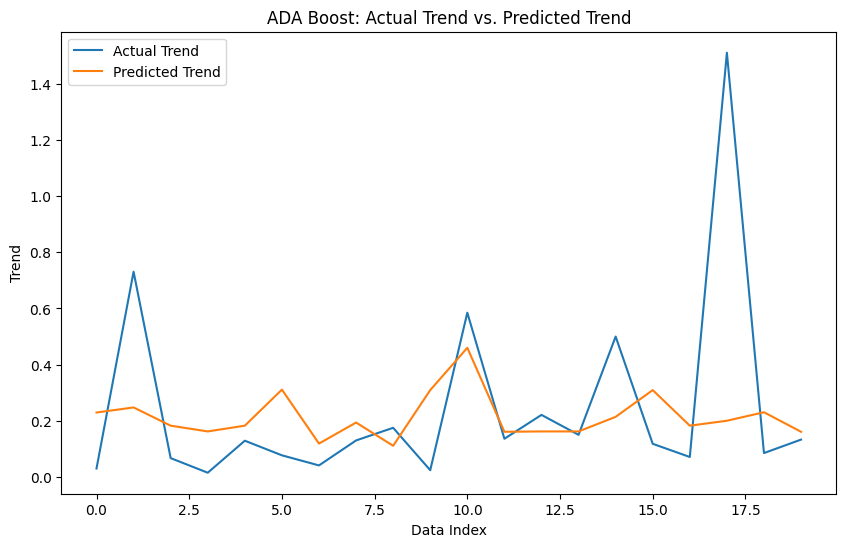


Results for Linear SVR:
Mean Squared Error: 0.16536393071568067
R-squared Score: -0.3742324592471722


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


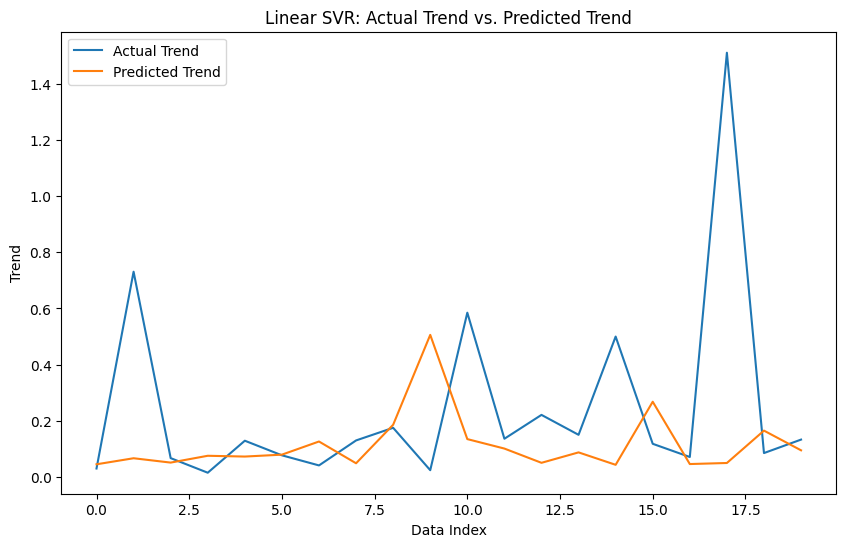

In [25]:
Name = ['Linear Regression','Decision Tree','Random Forest','SVR','XGBoost','LightGBM','Gradient Boosting Regressor' ,'ADA Boost','Linear SVR']
accuracy = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Results for {name}:")
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared Score: {r2}")
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(len(y_test)), y_test, label='Actual Trend')
    plt.plot(np.arange(len(y_test)), y_pred, label='Predicted Trend')
    plt.xlabel('Data Index')
    plt.ylabel('Trend')
    plt.title(f'{name}: Actual Trend vs. Predicted Trend')
    plt.legend()
    plt.show()
    accuracy.append(r2)
    print()

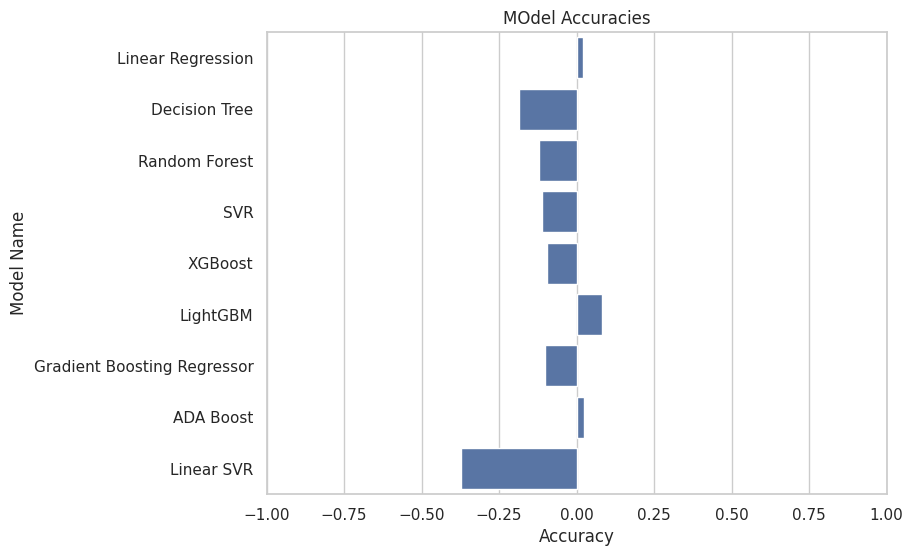

In [26]:
data=pd.DataFrame({'Names':Name,'Accuracies':accuracy})

sns.set(style='whitegrid')

plt.figure(figsize=(8,6))
plt.xlim(-1,1)

sns.barplot(x='Accuracies',y='Names',data=data,color='b')

plt.xlabel('Accuracy')
plt.ylabel('Model Name')
plt.title('MOdel Accuracies')

plt.show()